In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
import pandas as pd
%matplotlib inline

In [16]:
# Files for the DocDB presentation:
#f_s = TFile("MCC7CorsikaCosmicFULLHitFix_dens.root","READ")
#f_t = TFile("DataCosmicFULLHitFix_dens.root","READ")

f_s = TFile("/Users/ah673/WorkArea/Root6LArLite/UserDev/FindNeutrinos/FindCutValue/mac/dens_mcc8_intime.root","READ")
f_t = TFile("/Users/ah673/WorkArea/Root6LArLite/UserDev/FindNeutrinos/FindCutValue/mac/dens_mcc8_offbeam.root","READ")

s_evts = f_s.tree.GetEntries()
t_evts = f_t.tree.GetEntries()

In [17]:
#040417
tot_gaus_mc = []
tot_shr_mc = []
tot_gaus_ext = []
tot_shr_ext = []

for i in xrange(s_evts):
    f_s.tree.GetEntry(i)
    tot_gaus_mc.append(f_s.tree.hits_tot)
    tot_shr_mc.append(f_s.tree.shr_hits_tot)

for i in xrange(t_evts):
    f_t.tree.GetEntry(i)
    tot_gaus_ext.append(f_t.tree.hits_tot)
    tot_shr_ext.append(f_t.tree.shr_hits_tot)


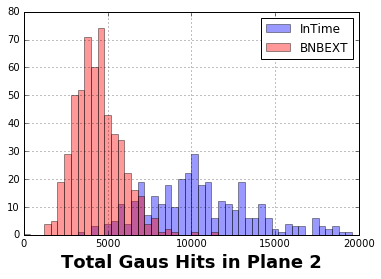

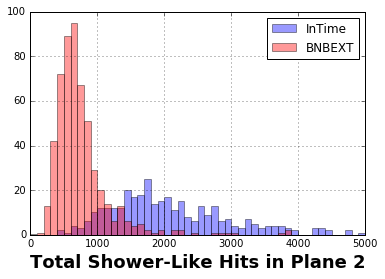

In [18]:
_,_,_ = plt.hist(tot_gaus_mc,bins=50,color='b',alpha=0.4,label='InTime',range=(0,20000))
_,_,_ = plt.hist(tot_gaus_ext,bins=50,color='r',alpha=0.4,label='BNBEXT',range=(0,20000))
plt.grid(True)
plt.legend()
plt.xlabel('Total Gaus Hits in Plane 2',fontsize=18,weight='bold')

plt.figure()
_,_,_ = plt.hist(tot_shr_mc,bins=50,color='b',alpha=0.4,label='InTime',range=(0,5000))
_,_,_ = plt.hist(tot_shr_ext,bins=50,color='r',alpha=0.4,label='BNBEXT',range=(0,5000))
plt.grid(True)
plt.legend()
plt.xlabel('Total Shower-Like Hits in Plane 2',fontsize=18,weight='bold')

In [140]:
f = '/Volumes/UBooNEData/reco12_mcc8/AnalysisRetreat_031317/data_EXT/full.root'
r = rn.root2array(f,treename='analysistree/anatree',\
                  branches=['hit_plane','no_hits','hit_channel'])
df = pd.DataFrame(r)

f2 = '/Volumes/UBooNEData/reco12_mcc8/AnalysisRetreat_031317/inTime/full.root'
r2 = rn.root2array(f2,treename='analysistree/anatree',branches=['hit_plane','no_hits','hit_channel'])
df20 = pd.DataFrame(r2)

df2 = df20[:1694]

In [143]:
print df['no_hits'].sum()
print df2['no_hits'].sum()

print df['no_hits']

27897752
64861648
0       13372
1       13466
2       13599
3       19102
4       15656
5       13038
6       20411
7       18743
8       23690
9       21263
10      20358
11      17375
12      14537
13      18088
14      13060
15       7700
16      21073
17      33119
18      12322
19      12504
20      22183
21      15998
22      13372
23      14230
24      15522
25      14598
26      15699
27       5015
28      13845
29      21804
        ...  
1664    12965
1665    15797
1666    26092
1667    22106
1668    17125
1669    18013
1670    14333
1671    13847
1672    14585
1673    18694
1674    17403
1675    17738
1676    19732
1677    27261
1678    21873
1679    18254
1680    12698
1681    19521
1682    17679
1683    17643
1684    17863
1685    18903
1686    19933
1687     7758
1688    13438
1689    16918
1690    18204
1691    22226
1692    11552
1693    14729
Name: no_hits, dtype: int32


In [149]:
ext_v = []
ext1_v = []
ext0_v = []

for i in xrange(df.shape[0]):
    
    t = df['hit_plane'][i]
    s = (t == 2).sum()
    s1 = (t == 1).sum()
    s0 = (t == 0).sum()
    ext_v.append(s)
    ext1_v.append(s1)
    ext0_v.append(s0)

intime_v = []
intime1_v = []
intime0_v = []
    
for i in xrange(df2.shape[0]):
    
    t = df2['hit_plane'][i]
    s = (t == 2).sum()
    s1 = (t == 1).sum()
    s0 = (t == 0).sum()

    intime_v.append(s)
    intime1_v.append(s1)
    intime0_v.append(s0)

print (intime0_v[0]), (intime1_v[0]), (intime_v[0])
print df2['no_hits'][4]
print df2['hit_plane'][4][600:]
#print df['no_hits'][4]
#print df['hit_plane'][4][15000:]
print intime0_v

18034 16695 5271
60794
[0 0 0 ..., 1 1 1]
[18034, 15882, 11898, 11606, 18598, 13230, 6946, 10298, 10741, 12976, 19784, 13263, 16814, 12478, 21407, 15125, 18251, 13197, 10474, 15412, 15487, 5932, 11238, 14959, 10295, 5214, 14747, 13601, 14561, 15655, 13188, 12098, 17612, 14023, 10173, 15845, 14967, 21045, 10838, 14913, 13884, 14049, 14754, 8395, 13235, 12161, 13122, 9504, 5457, 13283, 9903, 14688, 12390, 6102, 11100, 16240, 22110, 10975, 16748, 13908, 7439, 14401, 13872, 10854, 14574, 15500, 9671, 15314, 18999, 10299, 18663, 12328, 12112, 15888, 12366, 17377, 8866, 10872, 9624, 8740, 12226, 8348, 15960, 14559, 14420, 16327, 16982, 15020, 10219, 8207, 10125, 14632, 12698, 18204, 14888, 10475, 14321, 13568, 16204, 16796, 12405, 13863, 15926, 9195, 19313, 11766, 12020, 11629, 14597, 12957, 12379, 13529, 13634, 11457, 12265, 11796, 6765, 8626, 14761, 8314, 7612, 10148, 14844, 14721, 7979, 8735, 6528, 16850, 7125, 10676, 18310, 7994, 16680, 13979, 9378, 13799, 10892, 12388, 5071, 14870, 1508

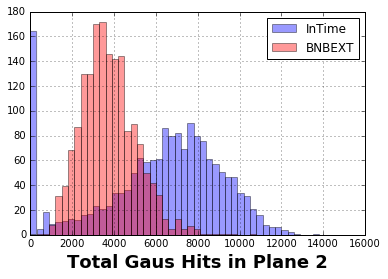

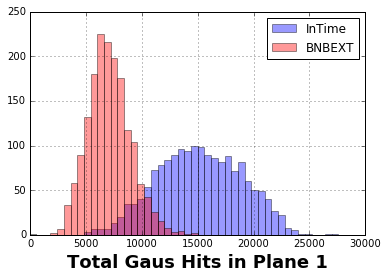

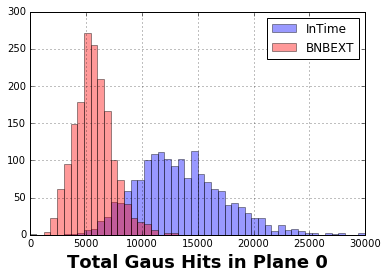

In [153]:
n = False

_,_,_ = plt.hist(intime_v,bins=50,color='b',normed=n,alpha=0.4,label='InTime',range=(0,15000))
_,_,_ = plt.hist(ext_v,bins=50,color='r',normed=n,alpha=0.4,label='BNBEXT',range=(0,15000))
plt.grid(True)
plt.legend()
plt.xlabel('Total Gaus Hits in Plane 2',fontsize=18,weight='bold')
#plt.ylim(0,215)

plt.figure()
_,_,_ = plt.hist(intime1_v,bins=50,color='b',normed=n,alpha=0.4,label='InTime',range=(0,30000))
_,_,_ = plt.hist(ext1_v,bins=50,color='r',normed=n,alpha=0.4,label='BNBEXT',range=(0,30000))
plt.grid(True)
plt.legend()#loc ='upper left',bbox_to_anchor=(0,1))
plt.xlabel('Total Gaus Hits in Plane 1',fontsize=18,weight='bold')
#plt.ylim(0,215)

plt.figure()
_,_,_ = plt.hist(intime0_v,bins=50,color='b',normed=n,alpha=0.4,label='InTime',range=(0,30000))
_,_,_ = plt.hist(ext0_v,bins=50,color='r',normed=n,alpha=0.4,label='BNBEXT',range=(0,30000))
plt.grid(True)
plt.legend() #loc ='upper left',bbox_to_anchor=(0,1))
plt.xlabel('Total Gaus Hits in Plane 0',fontsize=18,weight='bold')
#plt.ylim(0,215)

In [119]:
lst_col='hit_channel'
x = df
flat = pd.DataFrame({col:np.repeat(x[col].values, x[lst_col].str.len())\
              for col in x.columns.difference([lst_col])\
             }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]

In [120]:
x2 = df2
flat2 = pd.DataFrame({col:np.repeat(x2[col].values, x2[lst_col].str.len())\
              for col in x2.columns.difference([lst_col])\
             }).assign(**{lst_col:np.concatenate(x2[lst_col].values)})[x2.columns.tolist()]

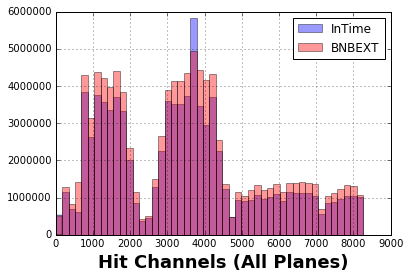

In [154]:
n = False

_,_,_ = plt.hist(flat2.hit_channel.values,bins=50,color='b',normed=n,alpha=0.4,label='InTime',range=(0,8600))
_,_,_ = plt.hist(flat.hit_channel.values,bins=50,color='r',normed=n,alpha=0.4,label='BNBEXT',range=(0,8600))
plt.grid(True)
plt.legend()
plt.xlabel('Hit Channels (All Planes)',fontsize=18,weight='bold')
#plt.ylim(0,215)

### OPEN vs UNBIASED

In [155]:
fextub = '/Volumes/UBooNEData/reco12_mcc8/AnalysisRetreat_031317/data_EXT_unbiased/full.root'
rextub = rn.root2array(fextub,treename='analysistree/anatree',\
                  branches=['hit_plane','no_hits','hit_channel'])
dfextub0 = pd.DataFrame(rextub)

fopen = '/Volumes/UBooNEData/reco12_mcc8/AnalysisRetreat_031317/MC_corsika_open/full.root'
ropen = rn.root2array(fopen,treename='analysistree/anatree',branches=['hit_plane','no_hits','hit_channel'])
dfopen = pd.DataFrame(ropen)

dfextub = dfextub0[:5500]

In [156]:
print dfopen.shape

dfextub.shape

(5500, 3)


(5500, 3)

In [157]:
ext2_v = []
ext1_v = []
ext0_v = []

for i in xrange(dfextub.shape[0]):
    
    t = dfextub['hit_plane'][i]
    s = (t == 2).sum()
    s1 = (t == 1).sum()
    s0 = (t == 0).sum()
    ext2_v.append(s)
    ext1_v.append(s1)
    ext0_v.append(s0)

open2_v = []
open1_v = []
open0_v = []
    
for i in xrange(dfopen.shape[0]):
    
    t = dfopen['hit_plane'][i]
    s = (t == 2).sum()
    s1 = (t == 1).sum()
    s0 = (t == 0).sum()

    open2_v.append(s)
    open1_v.append(s1)
    open0_v.append(s0)

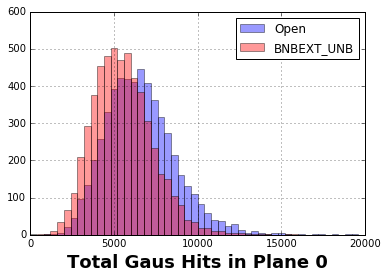

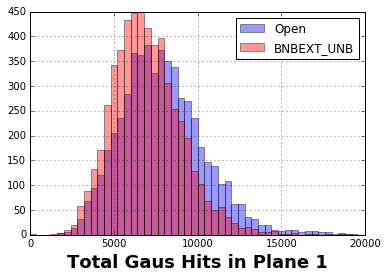

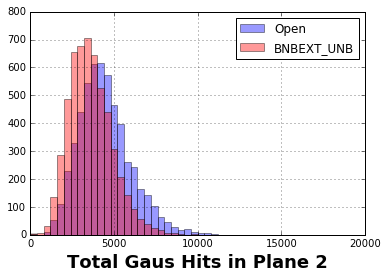

In [163]:
n = False

_,_,_ = plt.hist(open0_v,bins=50,color='b',normed=n,alpha=0.4,label='Open',range=(0,20000))
_,_,_ = plt.hist(ext0_v,bins=50,color='r',normed=n,alpha=0.4,label='BNBEXT_UNB',range=(0,20000))
plt.grid(True)
plt.legend()
plt.xlabel('Total Gaus Hits in Plane 0',fontsize=18,weight='bold')
#plt.ylim(0,215)

plt.figure()
_,_,_ = plt.hist(open1_v,bins=50,color='b',normed=n,alpha=0.4,label='Open',range=(0,20000))
_,_,_ = plt.hist(ext1_v,bins=50,color='r',normed=n,alpha=0.4,label='BNBEXT_UNB',range=(0,20000))
plt.grid(True)
plt.legend()#loc ='upper left',bbox_to_anchor=(0,1))
plt.xlabel('Total Gaus Hits in Plane 1',fontsize=18,weight='bold')
#plt.ylim(0,215)

plt.figure()
_,_,_ = plt.hist(open2_v,bins=50,color='b',normed=n,alpha=0.4,label='Open',range=(0,20000))
_,_,_ = plt.hist(ext2_v,bins=50,color='r',normed=n,alpha=0.4,label='BNBEXT_UNB',range=(0,20000))
plt.grid(True)
plt.legend()#loc ='upper left',bbox_to_anchor=(0,1))
plt.xlabel('Total Gaus Hits in Plane 2',fontsize=18,weight='bold')
#plt.ylim(0,215)

In [159]:
lst_col='hit_channel'
x = dfopen
flat = pd.DataFrame({col:np.repeat(x[col].values, x[lst_col].str.len())\
              for col in x.columns.difference([lst_col])\
             }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]

x2 = dfextub
flat2 = pd.DataFrame({col:np.repeat(x2[col].values, x2[lst_col].str.len())\
              for col in x2.columns.difference([lst_col])\
             }).assign(**{lst_col:np.concatenate(x2[lst_col].values)})[x2.columns.tolist()]

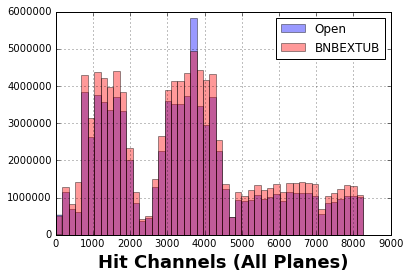

In [160]:
n = False

_,_,_ = plt.hist(flat2.hit_channel.values,bins=50,color='b',normed=n,alpha=0.4,label='Open',range=(0,8600))
_,_,_ = plt.hist(flat.hit_channel.values,bins=50,color='r',normed=n,alpha=0.4,label='BNBEXTUB',range=(0,8600))
plt.grid(True)
plt.legend()
plt.xlabel('Hit Channels (All Planes)',fontsize=18,weight='bold')
#plt.ylim(0,215)